In [2]:
# Abertura das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Segmentar em atributos e classes
dados = pd.read_csv('/content/drive/MyDrive/Faculdade/wines-dataset.csv', sep =',') 
dados_atributos = dados.drop(columns=['quality'])
dados_classes = dados['quality']
dados.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  category  
0      8.8        6         0  
1      9.5        6         0  
2     10.1        6         0  
3      9.9        6         0  
4      9.9        6         0

In [4]:
# Checando a qualidade dos dados
pd.isnull(dados)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
6492          False             False        False           False      False   
6493          False             False        False           False      False   
6494          False             False        False           False      False   
6495          False             False        False           False      False   
6496          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
6492                False                 False    False  False      False   
6493                False                 False    False  False      False   
6494                False                 False    False  False      False   
6495                False                 False    False  False      False   
6496                False                 False    False  False      False   

      alcohol  quality  category  
0       False    False     False  
1       False    False     False  
2       False    False     False  
3       False    False     False  
4       False    False     False  
...       ...      ...       ...  
6492    False    False     False  
6493    False    False     False  
6494    False    False     False  
6495    False    False     False  
6496    False    False     False  

[6497 rows x 13 columns]

In [5]:
# Normalizar
from sklearn.preprocessing import MinMaxScaler
normalizer= MinMaxScaler()
# Obter o modelo de normalização - métod fit()
data_normalizer_wines = normalizer.fit(dados_atributos)
# Salvar o modelo normalizador para uso posterior
from pickle import dump
dump(data_normalizer_wines, open('data_normalizer_wines.pkl', 'wb'))

In [6]:
# Normalizar os dados originais - método fit_transform()
dados_atributos_normalized = normalizer.fit_transform(dados_atributos)
dados_atributos_normalized

array([[0.26446281, 0.12666667, 0.21686747, ..., 0.12921348, 0.11594203,
        0.        ],
       [0.20661157, 0.14666667, 0.20481928, ..., 0.15168539, 0.2173913 ,
        0.        ],
       [0.3553719 , 0.13333333, 0.24096386, ..., 0.12359551, 0.30434783,
        0.        ],
       ...,
       [0.20661157, 0.28666667, 0.07831325, ..., 0.29775281, 0.43478261,
        1.        ],
       [0.17355372, 0.37666667, 0.07228916, ..., 0.2752809 , 0.31884058,
        1.        ],
       [0.18181818, 0.15333333, 0.28313253, ..., 0.24719101, 0.43478261,
        1.        ]])

In [7]:
#1.4 Reconstituir os dados para o formato Data Frame
dados_atributos_normalized = pd.DataFrame(dados_atributos_normalized, columns=dados_atributos.columns)
dados_atributos_normalized

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.264463          0.126667     0.216867        0.308282   0.059801   
1          0.206612          0.146667     0.204819        0.015337   0.066445   
2          0.355372          0.133333     0.240964        0.096626   0.068106   
3          0.280992          0.100000     0.192771        0.121166   0.081395   
4          0.280992          0.100000     0.192771        0.121166   0.081395   
...             ...               ...          ...             ...        ...   
6492       0.198347          0.346667     0.048193        0.021472   0.134551   
6493       0.173554          0.313333     0.060241        0.024540   0.088040   
6494       0.206612          0.286667     0.078313        0.026074   0.111296   
6495       0.173554          0.376667     0.072289        0.021472   0.109635   
6496       0.181818          0.153333     0.283133        0.046012   0.096346   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.152778              0.377880  0.267785  0.217054   
1                0.045139              0.290323  0.132832  0.449612   
2                0.100694              0.209677  0.154039  0.418605   
3                0.159722              0.414747  0.163678  0.364341   
4                0.159722              0.414747  0.163678  0.364341   
...                   ...                   ...       ...       ...   
6492             0.107639              0.087558  0.150183  0.565891   
6493             0.131944              0.103687  0.154425  0.620155   
6494             0.097222              0.078341  0.166377  0.542636   
6495             0.107639              0.087558  0.161172  0.658915   
6496             0.059028              0.082949  0.161558  0.519380   

      sulphates   alcohol  category  
0      0.129213  0.115942       0.0  
1      0.151685  0.217391       0.0  
2      0.123596  0.304348       0.0  
3      0.101124  0.275362       0.0  
4      0.101124  0.275362       0.0  
...         ...       ...       ...  
6492   0.202247  0.362319       1.0  
6493   0.303371  0.463768       1.0  
6494   0.297753  0.434783       1.0  
6495   0.275281  0.318841       1.0  
6496   0.247191  0.434783       1.0  

[6497 rows x 12 columns]

In [8]:
#2 Balancear os dados
#Frequencia original das classes
print('Frequencia original das classes:\n', dados_classes.value_counts())
from imblearn.over_sampling import  SMOTE
#Construir o balanceador
resampler=SMOTE(k_neighbors=4)
dados_atributos_b, dados_classes_b = resampler.fit_resample(dados_atributos_normalized, dados_classes)
print('Frequencia balanceada das classes:\n', dados_classes_b.value_counts())

Frequencia original das classes:
 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
Frequencia balanceada das classes:
 6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64


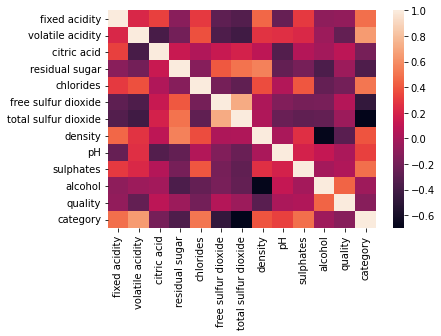

In [9]:
# Correlação de Pearson, mostrando os coeficientes de correlação de todas as variáveis
import seaborn as sns
sns.heatmap(dados.corr());

In [10]:
#Segmentar a base em dados para treinamento e dados para testes
#HOLD OUT (70/30)
from sklearn.model_selection import train_test_split
atr_train, atr_test, class_train, class_test = train_test_split(dados_atributos_b, dados_classes_b, test_size = 0.3)

#Importar o indutor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Intanciar um objeto a partir do indutor selecionado

In [ ]:
# REFINAR OS HIPERPARÂMETROS
import numpy as np
#Prepara os domínios para os hiperparâmetros da RandomForest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 10, num = 3)]
max_features = ['auto', 'sqrt', 'log2']
max_depth=[int(x) for x in np.linspace(start = 10, stop = 10, num = 5)] 
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

#Importar o avaliador de hiperparâmetros GridSearch
from sklearn.model_selection import GridSearchCV

#Montar a grade a ter os valores combinados
rf_random_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap,
}

#Iniciar a busca pelos melhores hiperparâmetros (Random Forest)
rf_grid=GridSearchCV(rf,rf_random_grid,refit=True,verbose=2)
rf_grid.fit(atr_train, class_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 10, 10, 10, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 10, 10]},
             verbose=2)

In [ ]:
from pprint import pprint
pprint(rf_grid.best_params_)

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}


In [ ]:
#Treinar o modelo com os hiperparâmetros ajustados
rf = RandomForestClassifier(**rf_grid.best_params_) #Instanciamos o estimador com sua arquitetura otimizado pelos hiperparâmetros abitidos com o gridsearch

#Treinar com os hiperparâmetros otimizados
rf_dados = rf.fit(atr_train,class_train)

#Acurácia do modelo treinado sem ajustar os hiperparâmetros
from sklearn import metrics
rf_predict = rf.predict(atr_test)
print('Acurácia preliminar do modelo com ajuste de hiperparâmetros - Random Forest')
print(metrics.accuracy_score(class_test, rf_predict))

Acurácia preliminar do modelo com ajuste de hiperparâmetros - Random Forest
0.7995298858294158


In [ ]:
# Salvar o melhor modelo classificador em disco
from pickle import dump
dump(rf_dados,open('rf_dados.pkl','wb'))

In [ ]:
#Acurácia do modelo com Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import numpy as np
rf_cross_validate_results = cross_validate(rf_dados, atr_train,class_train, cv =10)
print('Acurácia do modelo Cross Val RF:', np.mean(rf_cross_validate_results['test_score']))
rf_val_score= cross_val_score(rf, dados_atributos, dados_classes, cv=10)
print('Acurácia do modelo Cross Score RF:',np.mean(rf_val_score))

In [1]:
#Acurácia mais detalhada do RF
from sklearn.metrics import classification_report
predict_classes = rf_dados.predict(atr_test)
rf_dados.len = len(rf_dados.classes_)
rf_accuracy_report = classification_report(class_test,predict_classes, target_names = rf_dados.classes_)
print(rf_accuracy_report)

NameError: ignored